# 0. Wiederholung: Freies Teilchen

Die Schrödinger-Gleichung eines freien Teilchens in einer Dimension lautet:

$$
-\frac{\partial^2 }{\partial x^2} \Psi(x) = E \Psi(x)
$$

Diese lässt sich umformulieren zu:

$$
\frac{\partial^2 }{\partial x^2} \Psi(x) = -k^2 \Psi(x)~~~\text{mit}~k=\sqrt{E}~\forall~E \geq 0
$$

Diese lineare, homogene Differentialgleichung zweiter Ordnung ist identisch zum einfachen harmonischen Oszillator. Dessen allgemeine Lösung ist:

$$
\Psi(x) = c_1 \cdot e^{ikx} + c_2 \cdot e^{-ikx}
$$

Das freie Teilchen befindet sich also in einer Superposition von Wellenfunktionen verschiedener Phasen, die beliebige Energiewerte durch $k$ annehmen können.

Allgemein gehen wir zum Lösen der Schrödinger-Gleichung (SG) folgendermaßen vor:

   1. Aufstellen des Hamilton-Operators
   2. "educated guess" der Wellenfunktion
   3. Einsetzen von Randbedingungen
   4. Differentialgleichung in bekanntes Problem umformen

# 1. Seminar: Translation und Schwingung

## 1. Translation: Teilchen im Kasten
### a) Lösen der Schrödinger-Gleichung

$$
\hat{H} = - \frac{\partial^2}{\partial x^2} + U(x), ~~~U(x) =
    \begin{cases}
      0, & \text{für }\  0 \leq x \leq L \\
      \infty, & \text{für}\ (x < 0, x > L) 
    \end{cases}
$$

Allgemeiner Ansatz:

$$
\Psi_{k}(x) =A e^{i k x}+B e^{-i k x}
$$

Weil das Potential an den Wänden unendlich hoch ist, muss diese dort stetig gegen 0 streben.

$$
\Psi_{k}(x \rightarrow 0, x \rightarrow L) = Ae^0 + Be^0 = 0 \\
\therefore A = -B
$$

Da A und B constant sind, gilt für den Kasten:

$$
\Psi_{k}(x) = A [{\cos(kx)} + i\sin(kx) - {\cos(kx)} + i\sin(kx)] \\
\Psi_{k}(x) = A \sin(kx)
$$
Wobei wir die Faktoren und $i$ in A kombiniert haben. Generell gilt, dass $A~\in~\mathbb{C}$.

Für $x = L$ gilt:

$$
\Psi_{k}(L) = A \sin(kL) = 0
$$

Das ist erfüllt wenn $kL = n\pi$, wobei $n=1,2,3 ...$ Der Fall $n=0$ impliziert $k=0$, sodass $\Psi_k(x) = 0~\forall~x~\in~\mathbb{R}$, deswegen entfällt er (Born'sche Interpretation). Der Fall $n=-1,-2,-3...$ ist zwar möglich, gibt aber die qualitativ gleiche Lösung.

Im Kasten verhält sich das Teilchen wie ein freies Teilchen. Daraus folgt für die Energie mit diesen Randbedingungen:

$$
E_n = \frac{\hbar^2 k_n^2}{2m} = \frac{\hbar^2 (n\pi)^2}{2mL^2} = \frac{h n^2}{8mL^2}
$$

Die Normierungsbedingung für die Wellenfunktion lautet:

$$
\int_0^L |\Psi_{k}(x)|^2 dx = \int_0^L \left| A \sin\left(\frac{n\pi x}{L}\right) \right| ^2 dx = 1
$$

Mit der Hilfestellung $\int \sin^2(ax)dx = \frac{x}{2} - \frac{\sin(2ax)}{4a}$ vereinfacht sich dieses zu:

$$
\int_0^L |\Psi_{k}(x)|^2 dx = |A|^2 \left[ \frac{x}{2} - \underbrace{\frac{\sin(2\pi nx/L)}{4n\pi /L}}_{0~\text{für x=L, x=0}}   \right]^L_0 ~~\because \sin(2\pi n) = 0 ~\forall~n=1,2,3... \\
$$

Daraus folgt:

$$
1 = |A|^2 \frac{L}{2} ~\rightarrow ~ A = \sqrt{\frac{2}{L}}e^{i\phi}
$$

Dabei ist $e^{i\phi}$ ein komplexer Phasenfaktor. Dieser verändert den Erwartungswert (das Betragsquadrat) der Wellenfunktion nicht und wird daher üblicherweise ignoriert.

### b) + c) Skizzieren der Lösungen

Die Wellenfunktion des eindimensionalen Kastens ist eine einfache modulierte Sinus-Funktion:

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import numpy as np
import math
import matplotlib.pyplot as plt

# plot settings
plt.xkcd()
plt.style.use("seaborn-ticks")
plt.rcParams["legend.handlelength"] = 0.8
plt.rcParams["legend.framealpha"] = 0.8
font_size = 12
plt.rcParams.update({"font.size": font_size})

n = np.array([1, 2, 3, 4, 5])
x = np.linspace(0, 100, 1000)
L = 100

def energy(n, L):
    return n ** 2 / (8 * L ** 2)

def wavefunction(x, n, L):
    return np.sqrt(2 / L) * np.sin(x * math.pi * n / L)

@interact
def plot_wavefunction(n=(1,10,1)):
    fig, axes = plt.subplots(1,1, figsize=(4,4))
    axes.plot(x, wavefunction(x, n, L))
    axes.set_xlabel("Kastenlänge L")
    axes.set_ylabel("Amplitude $\Psi$")
    axes.set_yticks([])
    axes.set_xlim([0,L])
    

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

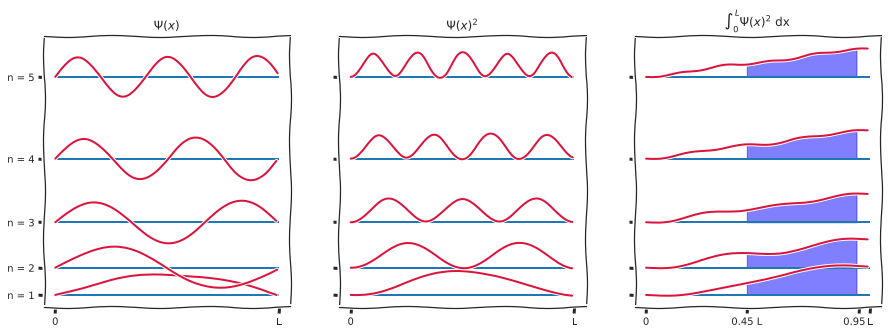

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np

n = np.array([1, 2, 3, 4, 5])
x = np.arange(0, 100)

def energy(n, L):
    return n ** 2 / (8 * L ** 2)

def wavefunction(x, n, L):
    return np.sqrt(2 / L) * np.sin(x * math.pi * n / L)

def int_wavefunction(x, n, L):
    return (2/L) * ((x/2) - (L/(4*n*math.pi)) * np.sin((2*n * math.pi * x) / L))

def square_wavefunction(x, n, L):
    return (np.sqrt(2 / L) * np.sin(x * math.pi * n / L))**2

fig, ax = plt.subplots(1,3 ,figsize=(15,5), sharey=True)
for i in n:
    ax[0].hlines(energy(i, 100), 0, 100)
    ax[0].plot(x, wavefunction(x, i, 100) / 5000 + energy(i, 100), color="crimson")
    ax[0].set_yticks(energy(n, 100))
    ax[0].set_yticklabels(["n = {}".format(i) for i in n])
    ax[0].set_xticks([0, 100])
    ax[0].set_xticklabels([0, "L"])
    ax[0].set_title("$\Psi(x)$")

for i in n:
    ax[1].hlines(energy(i, 100), 0, 100)
    ax[1].plot(x, square_wavefunction(x, i, 100) / 600 + energy(i, 100), color="crimson")
    ax[1].set_yticks(energy(n, 100))
    ax[1].set_yticklabels(["n = {}".format(i) for i in n])
    ax[1].set_xticks([0, 100])
    ax[1].set_xticklabels([0, "L"])
    ax[1].set_title("$\Psi(x)^2$")
    
for i in n:
    ax[2].hlines(energy(i, 100), 0, 100)
    ax[2].plot(x, int_wavefunction(x, i, 100) / 25000 + energy(i, 100), color="crimson")
    ax[2].fill_between(np.arange(45, 95), energy(i, 100), int_wavefunction(np.arange(45, 95), i, 100)/25000 + 
                       energy(i,100), color="blue", alpha=0.5)
    ax[2].set_yticklabels(["n = {}".format(i) for i in n])
    ax[2].set_xticks([0, 45, 95, 100])
    ax[2].set_xticklabels([0, "0.45 L", "0.95 L", "L"])
    ax[2].set_title("$\int_0^L \Psi(x)^2$ dx")    
    

plt.show()

In [7]:
# HIDDEN
#
#import nbinteract as nbi

#nbi.short_answer('Was ist die Aufenthaltswahrscheinlichkeitsdichte des Teilchens im Kasten im Bereich von 0.45 bis 0.95 L für n=2?', answers=['0.5', "50 %", "50%"], explanation="Dafür muss das Integral gebildet werden.")

Ein zweiter Kasten hat die Länge L'. Wie groß muss L' sein, damit die Energie des fünften Niveaus $E_5(L')$ gleich der Energie des dritten Niveaus des ersten Kastens $E_3(L)$ ist?

$$
E_3(L) = 9h^2/8mL^2 == E_5(L') = 25h^2/8mL'^2\\
25 L^2 = 9 L'^2 \\
L' = 5/3 L
$$

In [6]:
## HIDDEN

#import nbinteract as nbi

#nbi.short_answer("Wie groß muss L' sein (drei Stellen nach dem Komma)?", answers=['5/3', "1.666", "1.667"], explanation="Dafür müssen E_3(L) und E_5(L) gleichgesetzt werden.")